# Import libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from kaggle.api.kaggle_api_extended import KaggleApi
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

# Upload dataset

In [18]:
api = KaggleApi()
api.authenticate()

# Define dataset and destination
dataset_url = 'denkuznetz/food-delivery-time-prediction'
download_path = 'datasets/food-delivery-time-prediction'  # Specify destination folder

# Download dataset
api.dataset_download_files(dataset_url, path=download_path, unzip=True)

print(f"Dataset downloaded to: {os.path.abspath(download_path)}")

Dataset URL: https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction
Dataset downloaded to: C:\Users\ofekp\course_AI\datasets\food-delivery-time-prediction


# Show the data

In [19]:
dataset_file = 'datasets/food-delivery-time-prediction/Food_Delivery_Times.csv'
df = pd.read_csv(dataset_file);
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# Fill the nun valuse

In [21]:
arr = ['Weather','Time_of_Day','Traffic_Level']
arr[0]

'Weather'

In [22]:
arr = ['Weather','Time_of_Day','Traffic_Level']
for i in range(len(arr)):
    most_common = df[arr[i]].mode()[0]
    df[arr[i]].fillna(most_common, inplace=True)

In [23]:
df["Courier_Experience_yrs"].describe()
df["Courier_Experience_yrs"].fillna(5, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [25]:
df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

# Object to category

In [26]:
df[['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']] = df[['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']].astype('category')
print(df.dtypes)

Order_ID                     int64
Distance_km                float64
Weather                   category
Traffic_Level             category
Time_of_Day               category
Vehicle_Type              category
Preparation_Time_min         int64
Courier_Experience_yrs     float64
Delivery_Time_min            int64
dtype: object


# Data visualize

num_numeric=5, num_categorical=4
Creating a numeric histogram for column Order_ID in subplot 0
Creating a numeric histogram for column Distance_km in subplot 1
Creating a numeric histogram for column Preparation_Time_min in subplot 2
Creating a numeric histogram for column Courier_Experience_yrs in subplot 3
Creating a numeric histogram for column Delivery_Time_min in subplot 4
Creating a countplot for column Weather in subplot 5
Creating a countplot for column Traffic_Level in subplot 6
Creating a countplot for column Time_of_Day in subplot 7
Creating a countplot for column Vehicle_Type in subplot 8


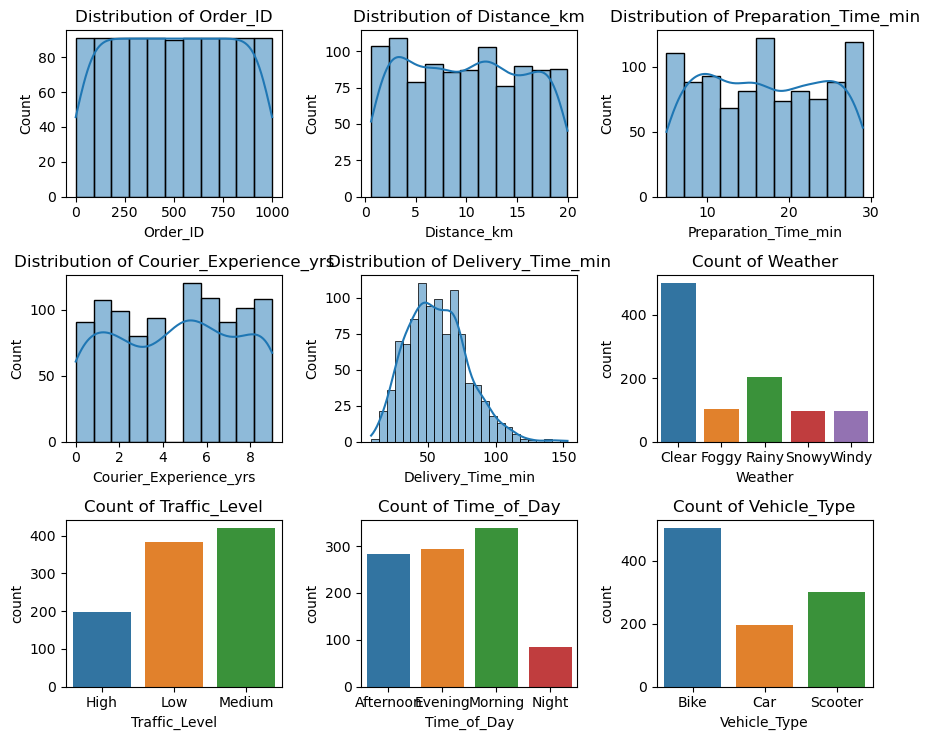

In [27]:

numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['category']).columns


num_numeric = len(numeric_cols)
num_categorical = len(categorical_cols)
total_plots = num_numeric + num_categorical
print(f'num_numeric={num_numeric}, num_categorical={num_categorical}')
      

cols = 3  # Number of columns in the grid
rows = math.ceil(total_plots / cols)  # Calculate rows to fit all plots, round up
fig, axes = plt.subplots(rows, cols, figsize=(9, 2.5 * rows))


axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    print(f'Creating a numeric histogram for column {col} in subplot {i}')
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j, col in enumerate(categorical_cols, start=len(numeric_cols)):
    print(f'Creating a countplot for column {col} in subplot {j}')
    sns.countplot(data=df, x=col, ax=axes[j])
    axes[j].set_title(f"Count of {col}")

plt.tight_layout()
plt.show()

# Traffic_Level and Time_of_Day visualize

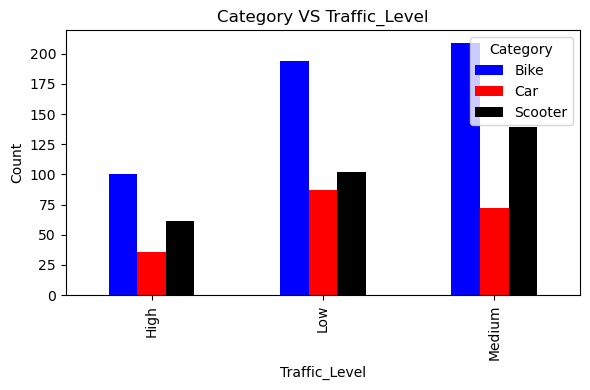

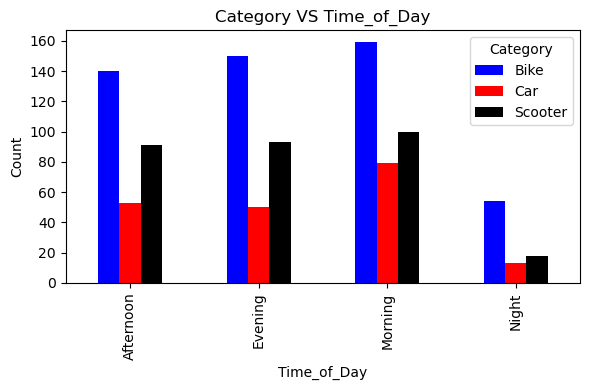

In [28]:
categorical_cols = ['Traffic_Level', 'Time_of_Day']

for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['Vehicle_Type'])
    
    cross_tab.plot(kind='bar', stacked=False, 
                   color=['blue', 'red','black','yellow'],  # Blue is "No", red is "Yes"
                   figsize=(6, 4))
    
    plt.title(f'Category VS {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Category', loc='upper right')
    plt.tight_layout()
    plt.show()

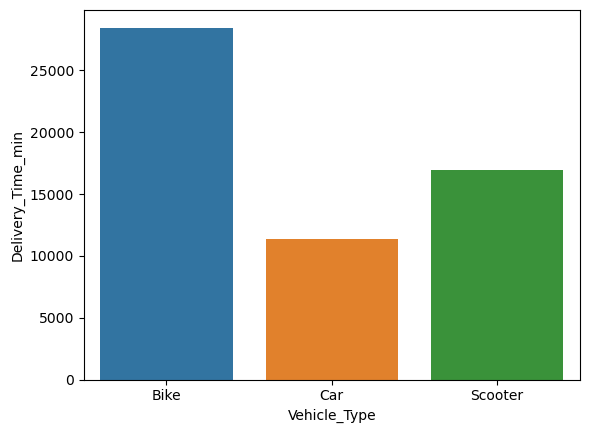

In [29]:
result = df.groupby("Vehicle_Type")["Delivery_Time_min"].sum().reset_index()
sns.barplot(x="Vehicle_Type",y="Delivery_Time_min",data=result);

# Values Over and Under Q1 and Q3

In [30]:
df["Speed"] = df["Distance_km"]//(df["Delivery_Time_min"]/60)

In [31]:
df.groupby("Vehicle_Type")["Speed"].mean().reset_index()

,Vehicle_Type,Speed
0,Bike,9.538767
1,Car,9.717949
2,Scooter,9.804636


In [32]:
arr=["Bike","Scooter","Car"]
result = df.copy()
result.index=result["Vehicle_Type"]

In [33]:
for i in range(len(arr)):
    Drive = arr[i]
    avg = result.loc[Drive, 'Speed'].mean()
    median = result.loc[Drive, 'Speed'].median()
    Q=0
    for i in range(result.loc[Drive, 'Speed'].shape[0]):
        Q += (result.loc[Drive, 'Speed'][i]-avg)**2
    
    Q = (Q/result.loc[Drive, 'Speed'].shape[0])**0.5

    Q1 = median-Q*3
    Q3 = median+Q*3

    indices = result.index.get_loc(Drive)
    for i in range(result.loc[Drive, 'Speed'].shape[0]):
        if(result.loc[Drive, 'Speed'][i]<Q1 or result.loc[Drive, 'Speed'][i]>Q3):
            print(Drive+" "+str(result.loc[Drive, 'Speed'][i]))
            #produat = produat.drop(range(indices.indices(len(produat))))

Bike 23.0
Car 24.0


In [34]:
df=df.drop([df[(df["Vehicle_Type"] == "Bike") & (df['Speed'] == 23.0)].index[0],df[(df["Vehicle_Type"] == "Car") & (df['Speed'] == 24.0)].index[0]])

# pearson, spearman and kendall correlation

In [49]:
group_1 = df['Delivery_Time_min']
group_2 = df['Distance_km']

pearson_corr = group_1.corr(group_2, method='pearson')
print(f"Pearson Correlation: {pearson_corr:.4f}")

spearman_corr = group_1.corr(group_2, method='spearman')
print(f"Spearman Correlation: {spearman_corr:.4f}")

kendall_corr = group_1.corr(group_2, method='kendall')
print(f"Kendall Correlation: {kendall_corr:.4f}")

Pearson Correlation: 0.7844
Spearman Correlation: 0.8201
Kendall Correlation: 0.6291


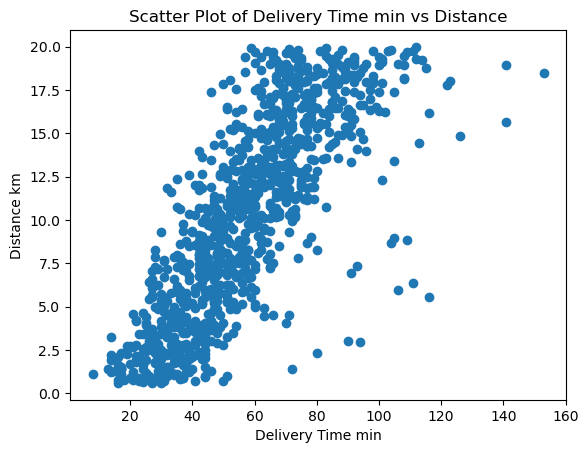

In [50]:
import matplotlib.pyplot as plt

plt.scatter(group_1, group_2)
plt.xlabel('Delivery Time min')
plt.ylabel('Distance km')
plt.title('Scatter Plot of Delivery Time min vs Distance')
plt.show()

Pearson Correlation: -0.0888
Spearman Correlation: -0.0851
Kendall Correlation: -0.0598


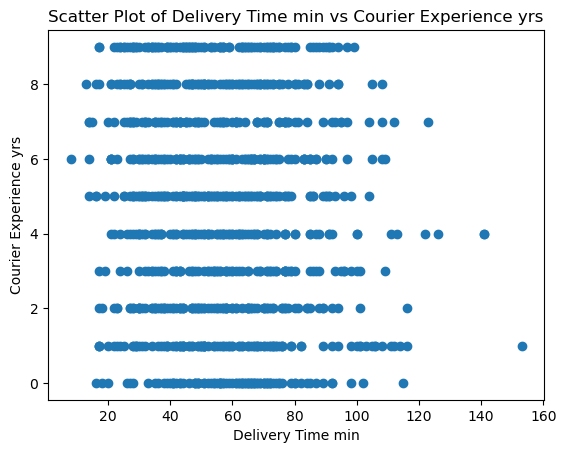

In [51]:
group_1 = df['Delivery_Time_min']
group_2 = df['Courier_Experience_yrs']

pearson_corr = group_1.corr(group_2, method='pearson')
print(f"Pearson Correlation: {pearson_corr:.4f}")

spearman_corr = group_1.corr(group_2, method='spearman')
print(f"Spearman Correlation: {spearman_corr:.4f}")

kendall_corr = group_1.corr(group_2, method='kendall')
print(f"Kendall Correlation: {kendall_corr:.4f}")

import matplotlib.pyplot as plt

plt.scatter(group_1, group_2)
plt.xlabel('Delivery Time min')
plt.ylabel('Courier Experience yrs')
plt.title('Scatter Plot of Delivery Time min vs Courier Experience yrs')
plt.show()

In [ ]:
The finel Conclution